In [199]:
import matplotlib.pyplot as plt
import pandas as pd
unrate = pd.read_csv('unrate.csv')
pres = pd.read_csv('president Year and Dates.csv',header = 0)
pres['Start_Date']=pd.to_datetime(pres['Start Date'])
pres['End_Date']=pd.to_datetime(pres['End Date'])
pres.dropna(inplace = True)
#print(pres)
unrate['DATE']=pd.to_datetime(unrate['DATE'])
#print(unrate['DATE'])
head = unrate.head(12)

In [200]:
#Number of presidents by party taken in the study
pres.groupby('Party').agg('count')['President']

Party
Democratic    6
Republican    6
Name: President, dtype: int64

In [150]:
import pandas as pd
import sqlite3
from datetime import datetime


#Make the db in memory
conn = sqlite3.connect(':memory:')
#write the tables
pres.to_sql('pres', conn, index=False)
unrate.to_sql('unrate', conn, index=False)

qry = '''
    select  
*
    from
        pres join unrate on
        DATE between Start_Date and End_Date
    '''
df = pd.read_sql_query(qry, conn)
df['DATE']=pd.to_datetime(df['DATE'])

#print(df[['President', 'Party','DATE', 'VALUE']])


C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:1345: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


In [202]:
df['Democratic'] = ''
df['Republic'] = ''
df
val = 'Democratic'

def AddValue(Data):
    if Data['Party'] == 'Democratic':
        Data[val] = Data['VALUE']
        return Data
    if Data['Party'] == 'Republican':
        Data['Republic'] = Data['VALUE']
        return Data

df = df.apply(AddValue,axis = 1)
df['Democratic']=pd.to_numeric(df['Democratic'])
df['Republic']=pd.to_numeric(df['Republic'])
df['DATE']=pd.to_datetime(df['DATE'])
df.set_index('DATE',inplace = True)


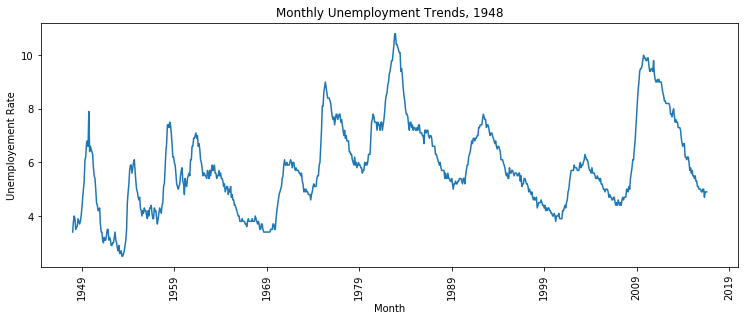

In [190]:
plt.figure(figsize=(12.5,4.5))
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Unemployement Rate')
plt.title('Monthly Unemployment Trends, 1948')
plt.plot(df.index,df['VALUE'])
#plt.scatter(df.index,df['Democratic'],label = 'Dems',marker = '^',color = 'green')
plt.show()

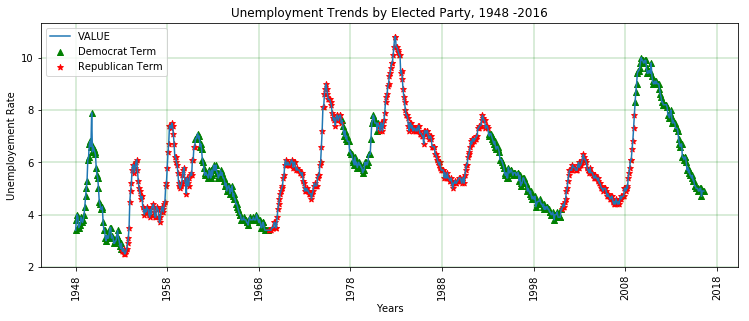

In [189]:
#Dems vs Republicans 
plt.figure(figsize=(12.5,4.5))
plt.xticks(rotation = 90)
plt.xlabel('Years')
plt.ylabel('Unemployement Rate')
plt.title('Unemployment Trends by Elected Party, 1948 -2016')
plt.plot(df.index,df['VALUE'])
plt.scatter(df.index,df['Democratic'],label = 'Democrat Term',marker = '^',color = 'green')
plt.scatter(df.index,df['Republic'],label = 'Republican Term',marker = '*',color = 'red')
plt.grid(color='g', linestyle='-', linewidth=2, alpha = .15)
plt.legend(loc = 'upper left')
plt.show()

In [204]:
ListOfPrez = df.President.unique()

for i in ListOfPrez:
    
    df[i] = ''
    

def AddPrezValue(Data):
    President_name = Data['President']
    Data[President_name] = Data['VALUE']
    return Data
df1 = df.copy()
df1 = df1.apply(AddPrezValue,axis = 1)


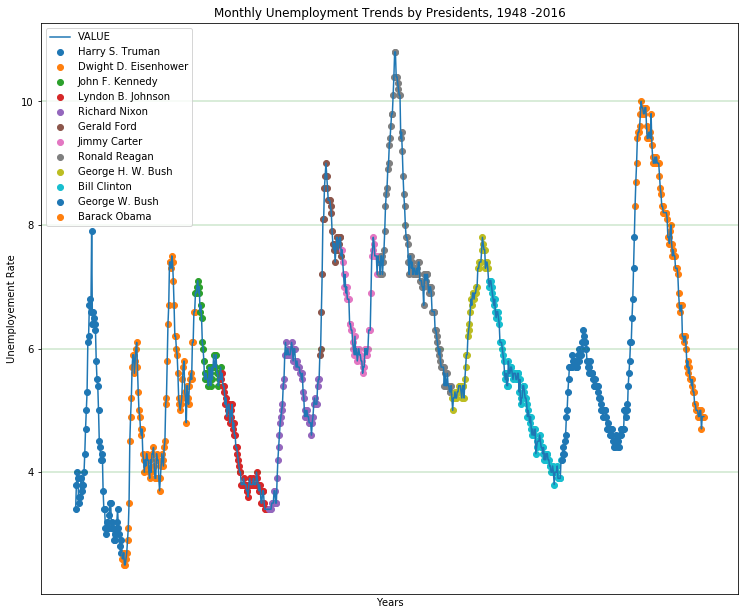

In [176]:
#Dems vs Republicans 
plt.figure(figsize=(12.5,10.5))
plt.xticks([])
plt.xlabel('Years')
plt.ylabel('Unemployement Rate')
#plt.yticks([])
plt.title('Monthly Unemployment Trends by Presidents, 1948 -2016')
plt.plot(df.index,df['VALUE'])
for i in ListOfPrez:
    plt.scatter(df1.index,pd.to_numeric(df1[i]),label = i)
#plt.scatter(df1.index,pd.to_numeric(df1[i]),label = 'Harry S. Truman',marker = PrezSymbol['Harry S. Truman'],color = 'green')
#plt.scatter(df.index,df['Republic'],label = 'Republic',marker = '*',color = 'red')
plt.grid(color='g', linestyle='-', linewidth=2, alpha = .15)
plt.legend(loc = 'upper left')
plt.show()

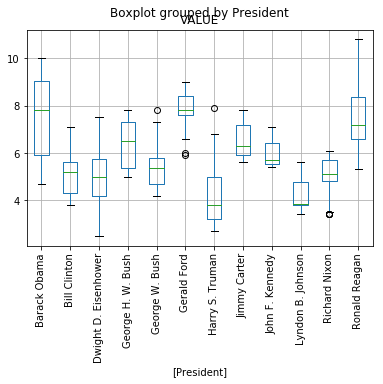

In [185]:
boxplot = df1.boxplot(column=['VALUE'],by=['President'])
plt.xticks(rotation = 90)
plt.show()

In [198]:
df1.groupby('President').agg(['mean','std'])['VALUE']
#df1.groupby('President').agg('std')['VALUE']

mean       std
President                               
Barack Obama          7.561538  1.714433
Bill Clinton          5.171875  0.938386
Dwight D. Eisenhower  4.931250  1.200291
George H. W. Bush     6.343750  0.944842
George W. Bush        5.308333  0.681433
Gerald Ford           7.837931  0.741819
Harry S. Truman       4.240984  1.327827
Jimmy Carter          6.535417  0.682763
John F. Kennedy       5.961765  0.568898
Lyndon B. Johnson     4.180645  0.642444
Richard Nixon         5.032836  0.838178
Ronald Reagan         7.514583  1.473555